In [1]:
%matplotlib inline


# 2D free support Wasserstein barycenters of distributions

Illustration of 2D Wasserstein barycenters if distributions are weighted
sum of diracs.


In [3]:
# Author: Vivien Seguy <vivien.seguy@iip.ist.i.kyoto-u.ac.jp>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
from src.main import *

## Generate data



In [4]:
N = 3
d = 2
measures_locations = []
measures_weights = []

for i in range(N):

    n_i = np.random.randint(low=1, high=20)  # nb samples

    mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean

    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    b_i = np.random.uniform(0., 1., (n_i,))
    b_i = b_i / np.sum(b_i)  # Dirac weights

    measures_locations.append(x_i)
    measures_weights.append(b_i)

In [5]:
# len(measures_locations[0])
# b.shape
# X_init.shape

# type(measures_weights)


## Compute free support barycenter



In [ ]:
k = 10  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

> /mnt/data1/jjs/anaconda3/envs/tutorial/lib/python3.7/site-packages/ot/lp/__init__.py(509)free_support_barycenter()
    507             T_i = emd(b, measure_weights_i, M_i)
    508             import pdb; pdb.set_trace()
--> 509             T_sum = T_sum + weight_i * np.reshape(1. / b, (-1, 1)) * np.matmul(T_i, measure_locations_i)
    510 
    511         displacement_square_norm = np.sum(np.square(T_sum - X))



ipdb>  np.reshape(1. / b, (-1, 1)).shape


(10, 1)


ipdb>   weight_i.shape


*** AttributeError: 'float' object has no attribute 'shape'


ipdb>  weight_i


0.3333333333333333


ipdb>  T_i.shape


(10, 19)


ipdb>  measure_locations_i


array([[-1.74405746, -2.33088241],
       [-1.53027203, -0.38910966],
       [-2.46831313, -3.67876652],
       [-1.71605865, -2.60562761],
       [-1.55449653, -1.8179163 ],
       [-1.73519639, -2.8968618 ],
       [-1.5627412 , -3.85464208],
       [-2.14509887, -3.76208661],
       [-1.92377825, -3.79063364],
       [-2.29606906, -4.42458486],
       [-1.83793195, -2.12813137],
       [-1.68909875, -1.97687479],
       [-1.42504216, -1.57986962],
       [-2.18904942, -3.58416849],
       [-2.03579307, -2.42157027],
       [-1.72013441, -1.73526201],
       [-2.31027248, -5.12986654],
       [-2.0682932 , -2.95264218],
       [-1.87229562, -2.82886523]])


ipdb>  measure_locations_i.shape


(19, 2)


ipdb>  np.matmul(T_i, measure_locations_i).shape


(10, 2)


ipdb>  np.reshape(1. / b, (-1, 1)) * np.matmul(T_i, measure_locations_i).shape


array([[100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.],
       [100.,  20.]])


ipdb>  np.matmul(T_i, measure_locations_i)


array([[-0.18446482, -0.22869986],
       [-0.20671176, -0.35879348],
       [-0.1453548 , -0.16322875],
       [-0.24105302, -0.40314513],
       [-0.16715926, -0.13910934],
       [-0.22755264, -0.37047855],
       [-0.17090573, -0.24158213],
       [-0.20082868, -0.28151532],
       [-0.17619252, -0.28836052],
       [-0.15627412, -0.38546421]])


ipdb>  np.reshape(1. / b, (-1, 1)) * np.matmul(T_i, measure_locations_i)


array([[-1.84464825, -2.28699856],
       [-2.0671176 , -3.58793481],
       [-1.45354801, -1.6322875 ],
       [-2.41053023, -4.03145135],
       [-1.6715926 , -1.39109337],
       [-2.27552645, -3.70478553],
       [-1.70905731, -2.41582132],
       [-2.00828682, -2.8151532 ],
       [-1.76192518, -2.88360523],
       [-1.5627412 , -3.85464208]])


ipdb>  np.reshape(1. / b, (-1, 1)).shape


(10, 1)


ipdb>  np.matmul(T_i, measure_locations_i).shape


(10, 2)


ipdb>  type(np.matmul(T_i, measure_locations_i))


<class 'numpy.ndarray'>


In [16]:
X_bary = (measures_locations, measures_weights, X_init, b)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

## Plot data



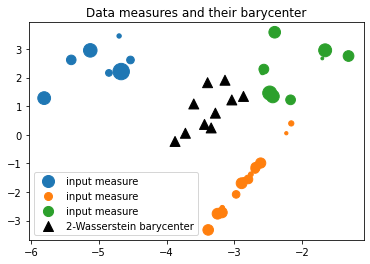

In [11]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], s=b_i * 1000, label='input measure')
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, c='black', marker='^', label='2-Wasserstein barycenter')
pl.title('Data measures and their barycenter')
pl.legend(loc=0)
pl.show()